In [1]:
import pyAudioKits.audio as ak

When discussing the representation of digital audio signals, we have discussed the truncation, and we said that it is equivalent to first sampling to get $\{x_d[n],-∞≤n<∞\}$, then multiplying by a **rectangular window** $w[n]=\begin{cases}1\quad 0≤n<N_{max}\\0\quad others\end{cases}$ to get $x[n]=\begin{cases}x_d[n],& 0≤n<N_{max}\\0,& others\end{cases}$. This operation is called **windowing**.

By windowing, the audio can also be truncated into many small segments and arranged into a matrix: $x[k,n]=x[kR+n]w[n],w[n]=\begin{cases}1\quad 0≤n<L\\0\quad others\end{cases}$, where $R$ is called the **step length** and $L$ is called the **frame length**. This is called **framing and windowing**. In addition to the vector representation of the whole audio, the matrix representation after framing and windowing is also one of the important representations of the audio signal.

The analysis methods used in the previous two sections are applied to the whole audio, and the energy, power, autocorrelation function, spectrum, power spectrum, etc. reflects the overall characteristics of the audio. At the end of the second section we mentioned a general stochastic process: $X_t=c_0+\displaystyle \sum_{k=1}^∞ [a_k sin(\frac{2\pi k}{T} t)+b_k cos(\frac{2\pi k}{T} t)]+\alpha_t,-∞<t<∞$, where $\alpha_t$ describes the random vibration, while $\displaystyle \sum_{k=1}^∞ [a_k sin(\frac{2\pi k}{T} t)+b_k cos(\frac{2\pi k}{T} t)]+c_0$ is the Fourier series representation of an arbitrary deterministic periodic signal, when we assume that $a_k$, $b_k$, $c_0$ and $T$ are constant with time and $\alpha_t$ is a single realization of a stationary stochastic process, thus allowing us to apply the analysis used in the previous two sections. However, if $a_k(t)$, $b_k(t)$, $c_0(t)$ and $T(t)$ vary with time and $\alpha_t$ is non-stationary, then after decomposing the stochastic process into deterministic and stochastic parts, the deterministic periodic signals no longer have fixed frequency components at each moment and the stochastic signal is no longer a smooth stochastic process. In this case, the analysis method mentioned in the previous two sections has some limitations.

First we create three monotones of 1s duration, but with different amplitudes and frequencies, and then concatenate them together.

In [2]:
monotone1=ak.create_Single_Freq_Audio(0.02,440,44100,1)
monotone2=ak.create_Single_Freq_Audio(0.01,880,44100,1)
monotone3=ak.create_Single_Freq_Audio(0.03,660,44100,1)
variating_tone = ak.concatenate([monotone1, monotone2, monotone3])

Plot the concatenated audio waveforms from 0 to 0.01s, 1 to 1.01s and 2 to 2.01s to compare the difference in amplitude and frequency.

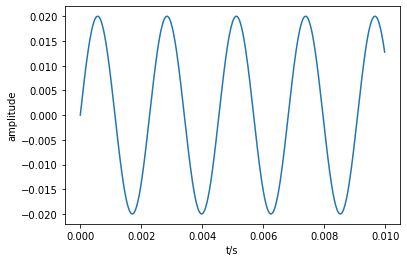

<Figure size 432x288 with 0 Axes>

In [3]:
variating_tone.plot(0, 0.01)

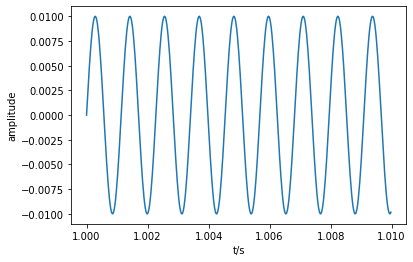

<Figure size 432x288 with 0 Axes>

In [4]:
variating_tone.plot(1, 1.01)

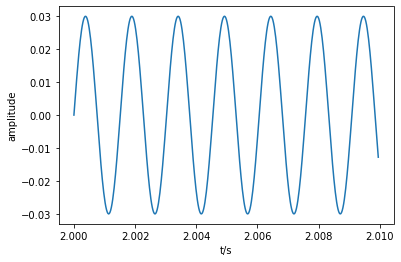

<Figure size 432x288 with 0 Axes>

In [5]:
variating_tone.plot(2, 2.01)

Calculate the power of the audio and it is found that it varies from 0 to 0.01s, 1 to 1.01s and 2 to 2.01s. The power is the smallest since the amplitude is the smallest from 1 to 1.01s, and the power is the largest since the amplitude is the largest from 2 to 2.01s. The power of the whole audio is between the maximum and minimum power.

In [6]:
import pyAudioKits.analyse as aly

aly.power(variating_tone)

0.00023333333333333336

In [7]:
aly.power(variating_tone[0.0:0.01])

0.00020327892831286895

In [8]:
aly.power(variating_tone[1.0:1.01])

5.016181796717433e-05

In [9]:
aly.power(variating_tone[2.0:2.01])

0.00044498231903136834

The autocorrelation function of the whole audio has a period of about $4.54s$ with a frequency of $220Hz$, which is the maximum convention for the frequencies of single tones with frequencies of $440Hz$, $60Hz$ and $880Hz$. But when intercepting the audio for autocorrelation within 0 to 0.5s, 1 to 2.5s and 1 to 2.5s, the autocorrelation function period results are all different, with $2.27ms$, $1.14ms$ and $1.52ms$ respectively.

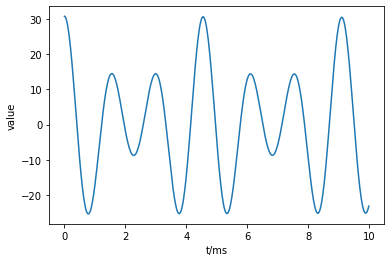

<Figure size 432x288 with 0 Axes>

In [10]:
aly.autocorr(variating_tone).plot(0, 10, xlabel="t/ms")

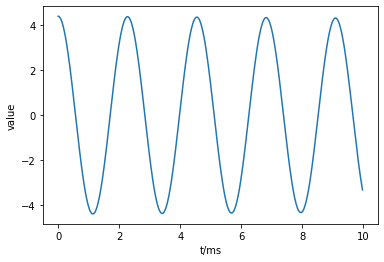

<Figure size 432x288 with 0 Axes>

In [11]:
aly.autocorr(variating_tone[0.0:0.5]).plot(0, 10, xlabel="t/ms")

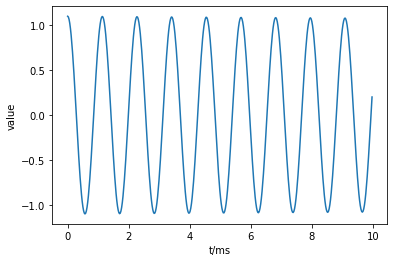

<Figure size 432x288 with 0 Axes>

In [12]:
aly.autocorr(variating_tone[1.0:1.5]).plot(0, 10, xlabel="t/ms")

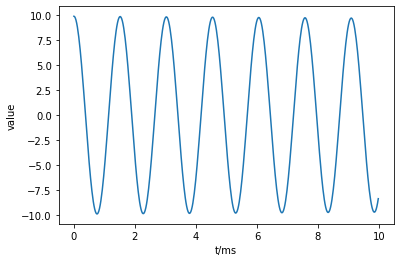

<Figure size 432x288 with 0 Axes>

In [13]:
aly.autocorr(variating_tone[2.0:2.5]).plot(0, 10, xlabel="t/ms")

Taking 1024 points for the Fourier transform, we can see that only the peak representing $440Hz$ appears on the spectrum at this point. This is because when performing the $N$-point Fourier transform, we select the first $N$ sample points of the audio by default. When the frequency components of the audio remain constant, it is equivalent to using the Fourier transform with all sample points, with only a difference in spectral resolution. However, since our audio is composed of three monotones with different frequencies in this case, the spectrum obtained from the 1024-point Fourier transform does not reflect all the frequency components.

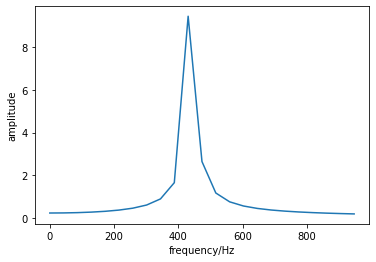

<Figure size 432x288 with 0 Axes>

In [14]:
aly.FFT(variating_tone, 1024).plot(0,1000)

The Fourier transform using all sample points can reflect all frequency components, but not the information "what frequency components are present at what time".

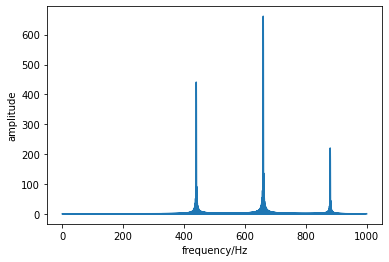

<Figure size 432x288 with 0 Axes>

In [15]:
aly.FFT(variating_tone).plot(0,1000)

The same problem exists for the power spectral density.

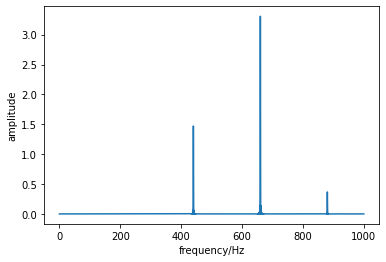

<Figure size 432x288 with 0 Axes>

In [16]:
aly.PSD(variating_tone).plot(0,1000)

Framing and windowing allow us to analyze the short-time characteristics of the audio. When the frame length used is small enough, we can treat the audio within each frame as consisting of a deterministic signal with a constant frequency component and a random signal which is a realization a stationary random process, thus applying the analysis methods mentioned in the previous two sections within each frame.

The windowing function of pyAudioKits can be used to framing and windowing audios. The step length is calculated as the ratio of the overlap between frames (0.5 as in the example means that the step size is half the frame length; taking 0 means that there is no overlap between frames, where the step size is equal to the frame length).

In [17]:
variating_tone_framed = variating_tone.framing(0.03,0.5)	#Using a rectangular window with a frame length of 0.03s and a step length of 0.015s to framing and windowing

All the same analysis statistics functions used before can be applied to the framed audio, and the returned result will have an additional frame dimension. This dimension is still in time units by default, but can also be in sample points count and frames count.

At this point it is possible to plot the power over time.

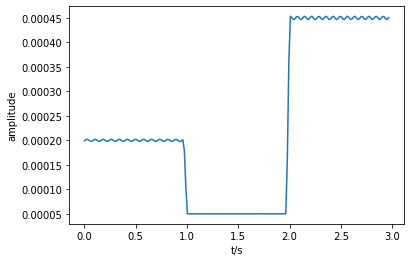

<Figure size 432x288 with 0 Axes>

In [18]:
aly.power(variating_tone_framed).plot()

It can also be expressed in the form of gain.

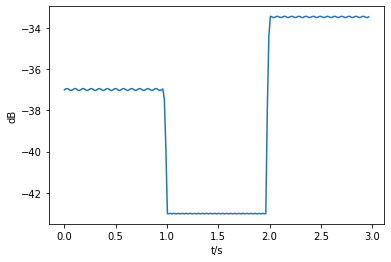

<Figure size 432x288 with 0 Axes>

In [19]:
aly.power(variating_tone_framed,dB=True).plot()

Show the results in frames count as x-axis units.

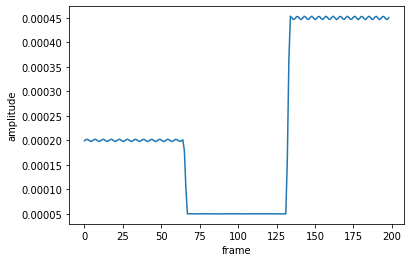

<Figure size 432x288 with 0 Axes>

In [20]:
aly.power(variating_tone_framed).plot(xlabel="frame")

The two-dimensional images of the autocorrelation function over time can be used to clearly distinguish the monotone periods at different time by the stripe spacing.

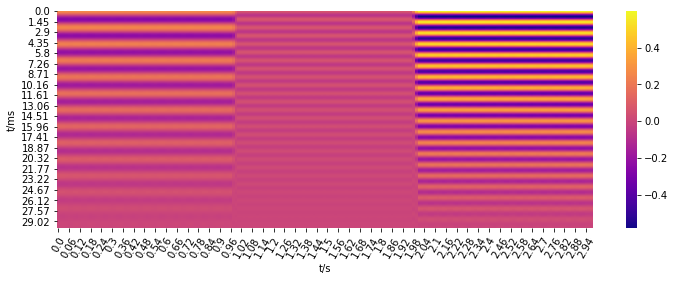

<Figure size 432x288 with 0 Axes>

In [21]:
aly.autocorr(variating_tone_framed).plot(ylabel="t/ms")

Use getMaxFrequency to get the frequency components and amplitudes with the maximum amplitude at each time.

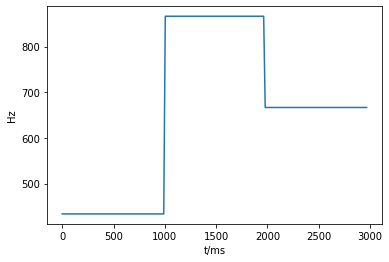

<Figure size 432x288 with 0 Axes>

In [22]:
aly.getMaxFrequency(variating_tone_framed)[0].plot(xlabel="t/ms")

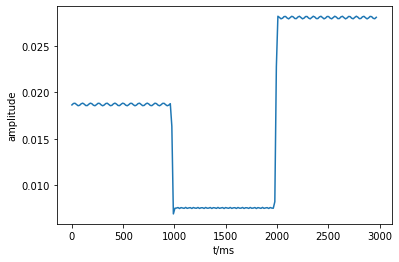

<Figure size 432x288 with 0 Axes>

In [23]:
aly.getMaxFrequency(variating_tone_framed)[1].plot(xlabel="t/ms")

By performing a 1024-point Fourier transform on the framed results, we can find that all three frequency components can be displayed successfully. The default display is the amplitude spectrum, and the amplitude of the different frequency components can be distinguished according to the warm and cold color tones.

We call the frequency spectrum with frame dimension obtained after framing and windowing **short-time spectrum**.

We can see that in addition to the main value of the largest amplitude in the center of each frequency component, there are side flaps next to it that are asymptotically zero, which is how the spectrum leakage is reflected in the short-time spectrum. The lower the spectral resolution, the more obvious this phenomenon is.

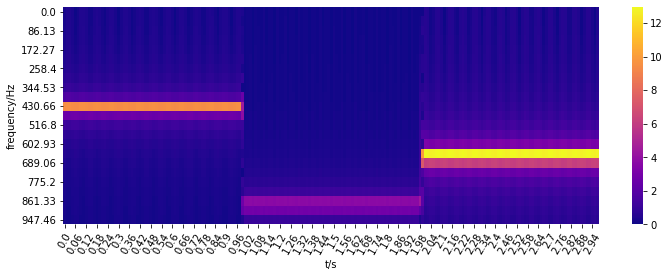

<Figure size 432x288 with 0 Axes>

In [24]:
aly.FFT(variating_tone_framed,1024).plot(ystart=0, yend=1000)

When the number of Fourier transform points is equal to the number of samples in each frame, the spectral resolution is increased.

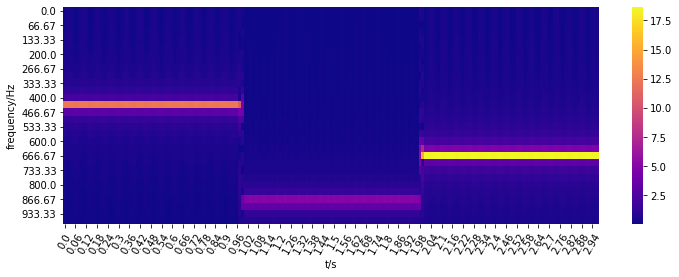

<Figure size 432x288 with 0 Axes>

In [25]:
aly.FFT(variating_tone_framed).plot(ystart=0, yend=1000)

Similarly, the variation of power spectral density with time can be shown.

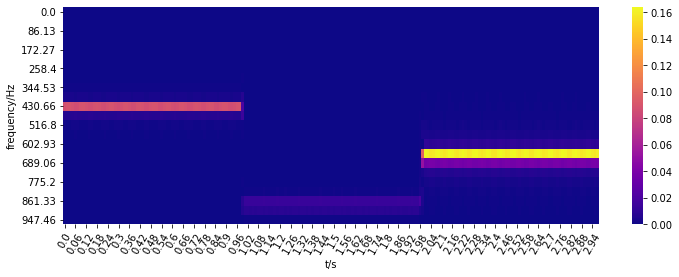

<Figure size 432x288 with 0 Axes>

In [26]:
aly.PSD(variating_tone_framed,1024).plot(ystart=0, yend=1000)

Notice that the spectrum appears blurred at the junction of different frequency components. We try different frame lengths.

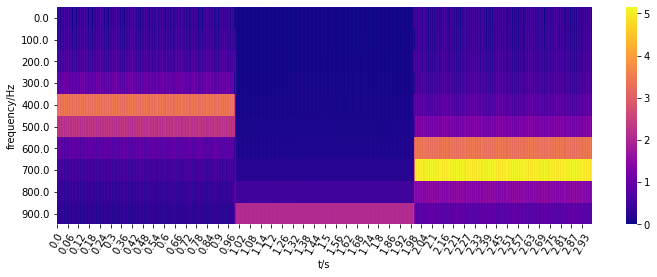

<Figure size 432x288 with 0 Axes>

In [27]:
variating_tone_framed2 = variating_tone.framing(0.01,0.5)
aly.FFT(variating_tone_framed2).plot(ystart=0, yend=1000)

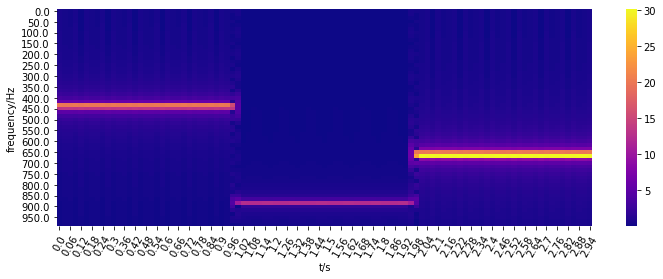

<Figure size 432x288 with 0 Axes>

In [28]:
variating_tone_framed2 = variating_tone.framing(0.06,0.5)
aly.FFT(variating_tone_framed2).plot(ystart=0, yend=1000)

It can be found that the spectral blurring at the junctions of different frequencies is less when the frame length is shorter, while it is heavier when the frame length is longer. We claim that **the short-time spectrum has higher temporal resolution** when the frame length is shorter. In the example audio, the frequency components do not change frequently, so the effect of temporal resolution seems to be trival. But when it comes to speech signal processing, the temporal resolution is the issue that has to be considered due to the complexity and variability of the frequency components of the audio.

At the same time, we can observe that **when the frame length is long, the short-time spectrum has a higher spectral resolution**. Therefore, the choice of frame length in constructing the short-time spectrum requires a trade-off between temporal resolution and spectral resolution. 0.03s is a general value.

When framing and windowing, besides adding the default rectangular windows, we can also add **Hanning window, Hamming window or Kaiser window**, which can effectively improve the spectrum leakage problem.

* Hannin window: $w[n]=\begin{cases}0.5+0.5(2\pi\frac{n}{2L+1}),& 0≤n<L\\0,& others\end{cases}$
* Hamming window: $w[n]=\begin{cases}0.54+0.46(2\pi\frac{n}{2L+1}),& 0≤n<L\\0,& others\end{cases}$
* Kaiser window: $w[n]=\begin{cases}\frac{I_0[\beta\sqrt{1-(1-\frac{2n}{L-1})^2}]}{I_0(\alpha)},& 0≤n<L\\0,& others\end{cases}$ , where $I_0$ is the first class Bessel function and $\beta$ is the parameter to be specified.

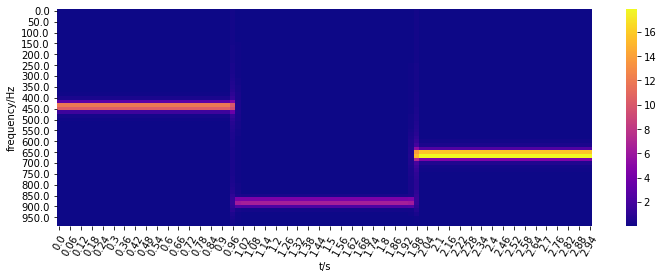

<Figure size 432x288 with 0 Axes>

In [29]:
variating_tone_framed2 = variating_tone.framing(0.06,0.5,window="hann")
aly.FFT(variating_tone_framed2).plot(ystart=0, yend=1000)

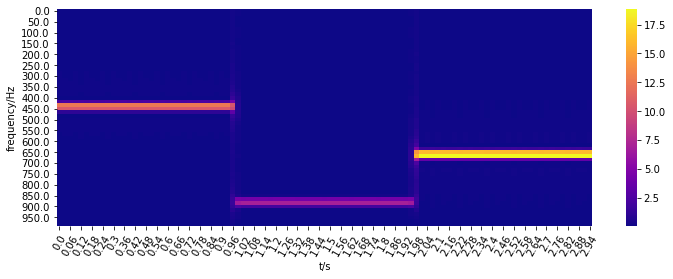

<Figure size 432x288 with 0 Axes>

In [30]:
variating_tone_framed2 = variating_tone.framing(0.06,0.5,window="hamming")
aly.FFT(variating_tone_framed2).plot(ystart=0, yend=1000)

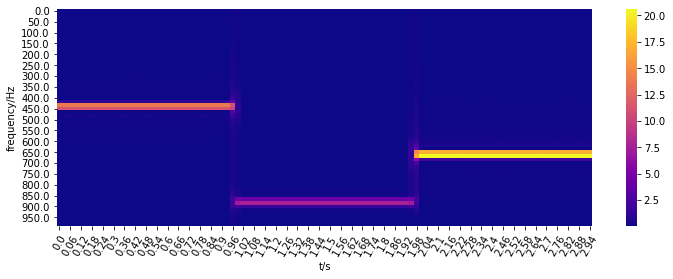

<Figure size 432x288 with 0 Axes>

In [31]:
variating_tone_framed2 = variating_tone.framing(0.06,0.5,window=("kaiser",4.0))
aly.FFT(variating_tone_framed2).plot(ystart=0, yend=1000)